In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.io
import h5py

In [2]:
f = h5py.File('faceimages .mat','r')
data = f['data'][:-1]

In [3]:
data = data - np.mean(data, axis = 0)
x = np.cov(data)

In [63]:
eigenValues, eigenVectors = np.linalg.eig(x)
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [64]:
y = np.matmul(eigenVectors.T, data)

In [80]:
h = [50 , 200, 400] 
image = 3
re_x = np.zeros([10304,len(h)+1])
for i in range(len(h)):
    re_x[:,i] = np.matmul(eigenVectors[:, :h[i]], y[:h[i], image])
    print(np.mean(np.sqrt(((re_x[:,i]-data[:,image])**2)))/len(data))
re_x[:,len(h)] = data[:,image]

0.0012660923585602942
0.0007396174273727317
0.0003759565891844323


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


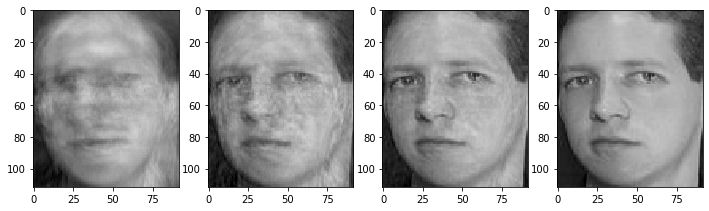

In [75]:
f, axarr = plt.subplots(1,len(h)+1,figsize=(12, 12))
for i in range(len(h)+1):
    temp = re_x[:,i].reshape(92,112)
    temp = np.real(temp.T) +137
    axarr[i].imshow(np.real(temp), cmap='gray', vmin=0, vmax=255)